

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("customer_booking.csv", encoding="latin1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [4]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [5]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [6]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5], dtype=int64)

In [7]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

Next we will check the distribution of the complete bookings.

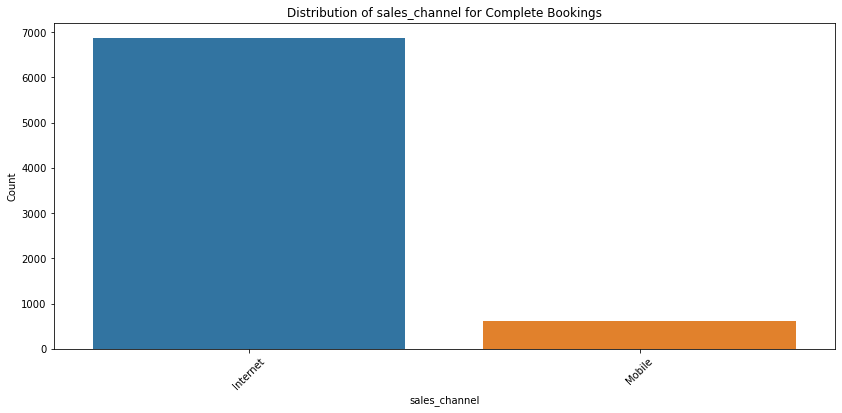

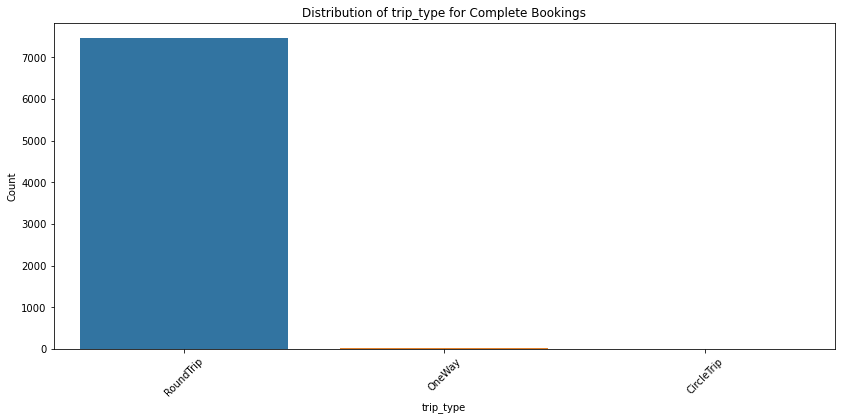

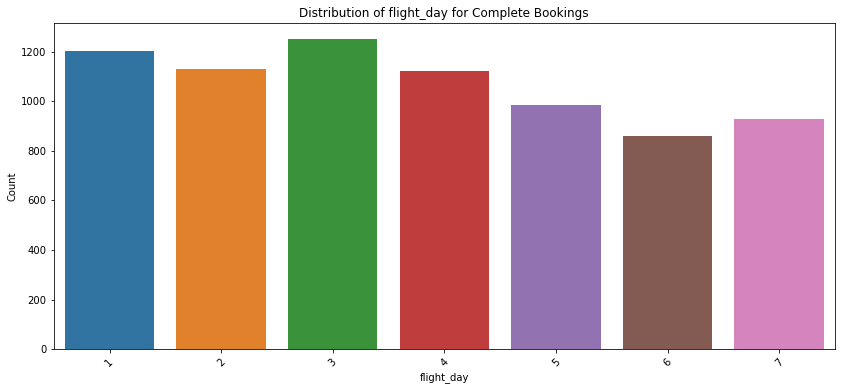

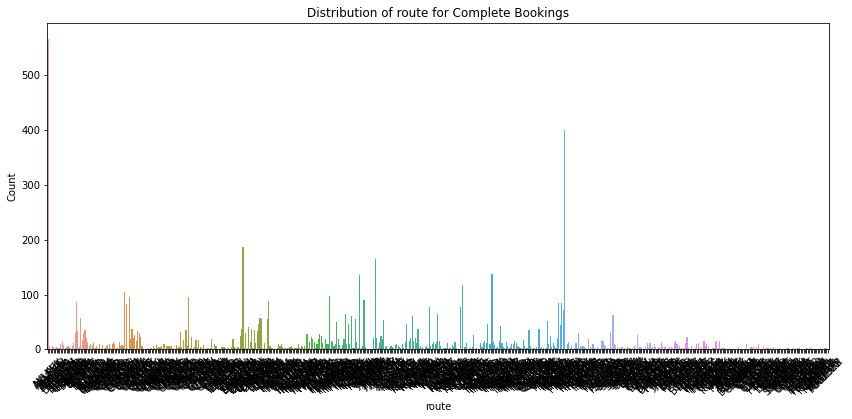

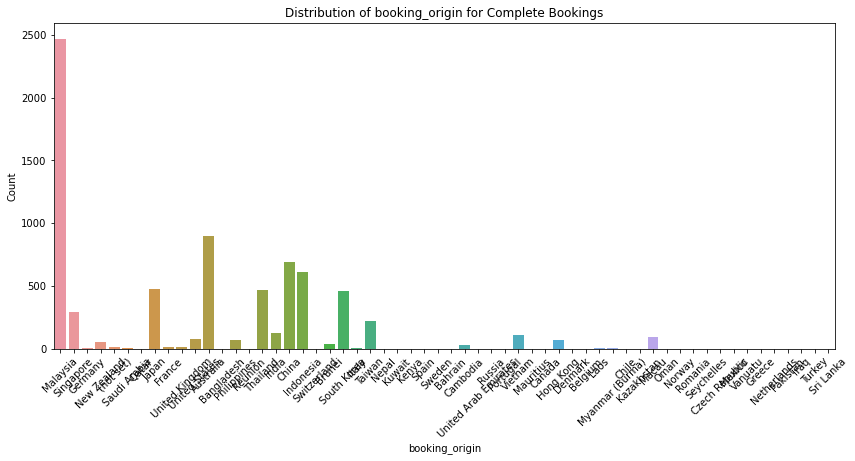

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the DataFrame for complete bookings
complete_bookings = df[df['booking_complete'] == 1]

# Define a list of categorical features
categorical_features = ['sales_channel', 'trip_type', 'flight_day', 'route', 'booking_origin']

# Plot histograms for categorical features
for feature in categorical_features:
    plt.figure(figsize=(14, 6))
    sns.countplot(x=feature, data=complete_bookings)
    plt.title(f'Distribution of {feature} for Complete Bookings')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

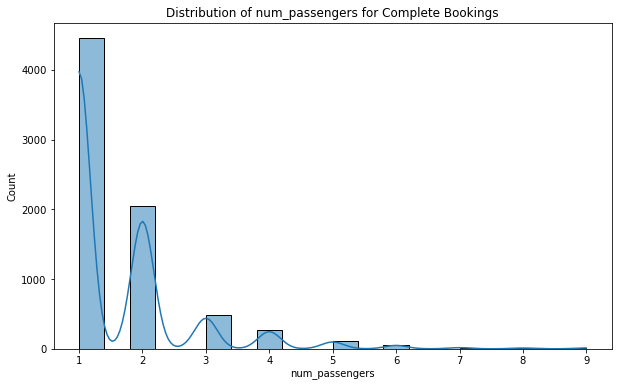

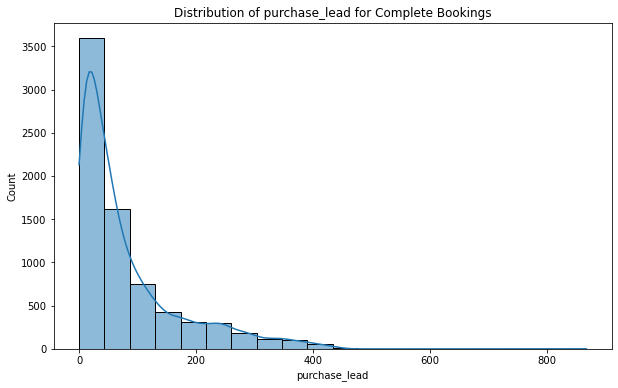

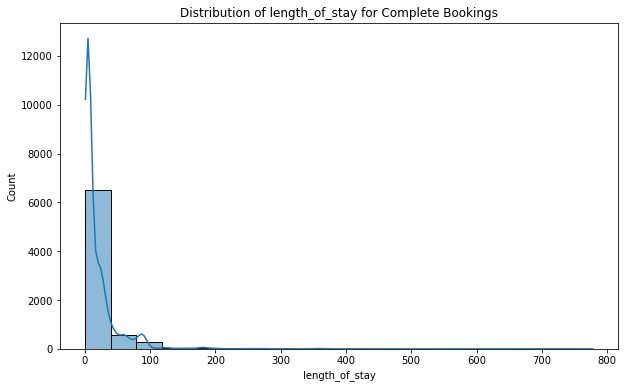

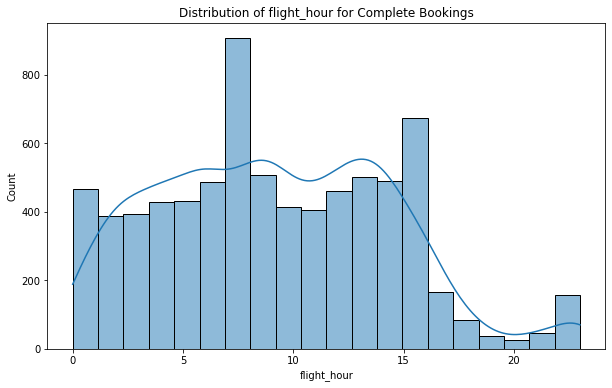

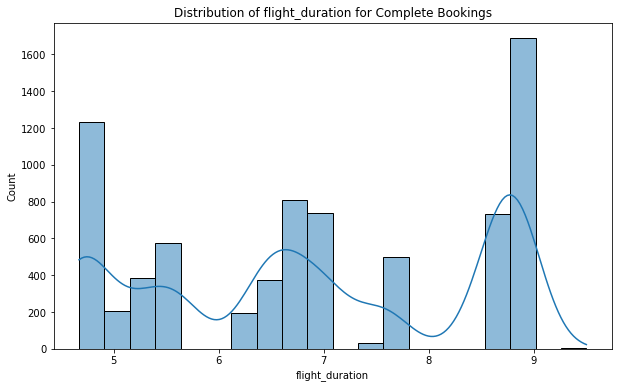

In [9]:
# Define a list of numerical features
numerical_features = ['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour', 'flight_duration']

# Plot histograms for numerical features
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=complete_bookings, x=feature, bins=20, kde=True)
    plt.title(f'Distribution of {feature} for Complete Bookings')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()

## EDA on the Categorical Values
We will plot graphs to show the distribution of the categorical values.

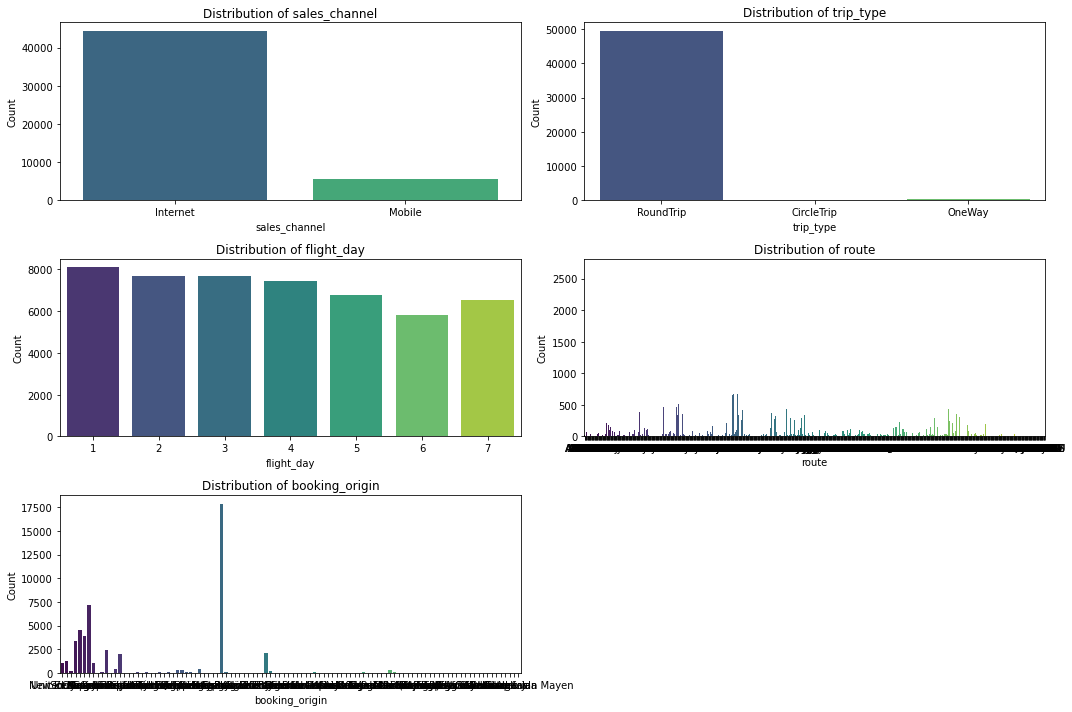

In [10]:
# List of categorical columns
categorical_columns = ['sales_channel', 'trip_type', 'flight_day', 'route', 'booking_origin']

# Visualize distribution of each categorical column
plt.figure(figsize=(15, 10))

for i, column in enumerate(categorical_columns, 1):
    plt.subplot(3, 2, i)
    sns.countplot(x=column, data=df, palette='viridis')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

We will the explore the unique values in each categorical column.

In [11]:
for column in ['sales_channel', 'trip_type', 'flight_day', 'route', 'booking_origin']:
    unique_values = df[column].unique()
    print(f'Unique values in {column}: {unique_values}')


Unique values in sales_channel: ['Internet' 'Mobile']
Unique values in trip_type: ['RoundTrip' 'CircleTrip' 'OneWay']
Unique values in flight_day: [6 3 4 1 7 2 5]
Unique values in route: ['AKLDEL' 'AKLHGH' 'AKLHND' 'AKLICN' 'AKLKIX' 'AKLKTM' 'AKLKUL' 'AKLMRU'
 'AKLPEK' 'AKLPVG' 'AKLTPE' 'AORICN' 'AORKIX' 'AORKTM' 'AORMEL' 'BBIMEL'
 'BBIOOL' 'BBIPER' 'BBISYD' 'BDOCTS' 'BDOCTU' 'BDOHGH' 'BDOICN' 'BDOIKA'
 'BDOKIX' 'BDOMEL' 'BDOOOL' 'BDOPEK' 'BDOPER' 'BDOPUS' 'BDOPVG' 'BDOSYD'
 'BDOTPE' 'BDOXIY' 'BKICKG' 'BKICTS' 'BKICTU' 'BKIHND' 'BKIICN' 'BKIKIX'
 'BKIKTM' 'BKIMEL' 'BKIMRU' 'BKIOOL' 'BKIPEK' 'BKIPER' 'BKIPUS' 'BKIPVG'
 'BKISYD' 'BKIXIY' 'BLRICN' 'BLRMEL' 'BLRPER' 'BLRSYD' 'BOMMEL' 'BOMOOL'
 'BOMPER' 'BOMSYD' 'BTJJED' 'BTUICN' 'BTUPER' 'BTUSYD' 'BTUWUH' 'BWNCKG'
 'BWNDEL' 'BWNHGH' 'BWNIKA' 'BWNKTM' 'BWNMEL' 'BWNOOL' 'BWNPER' 'BWNSYD'
 'BWNTPE' 'CANDEL' 'CANIKA' 'CANMEL' 'CANMRU' 'CANOOL' 'CANPER' 'CANSYD'
 'CCUMEL' 'CCUMRU' 'CCUOOL' 'CCUPER' 'CCUSYD' 'CCUTPE' 'CEBMEL' 'CEBOOL'
 'CEBPER' 

We will the examine the frequency of each value in the categorical columns.

In [12]:
for column in ['sales_channel', 'trip_type', 'flight_day', 'route', 'booking_origin']:
    value_counts = df[column].value_counts()
    print(f'Value counts for {column}:\n{value_counts}\n')


Value counts for sales_channel:
Internet    44382
Mobile       5618
Name: sales_channel, dtype: int64

Value counts for trip_type:
RoundTrip     49497
OneWay          387
CircleTrip      116
Name: trip_type, dtype: int64

Value counts for flight_day:
1    8102
3    7674
2    7673
4    7424
5    6761
7    6554
6    5812
Name: flight_day, dtype: int64

Value counts for route:
AKLKUL    2680
PENTPE     924
MELSGN     842
ICNSIN     801
DMKKIX     744
          ... 
DACPUS       1
KCHMRU       1
CXRMEL       1
CCUMRU       1
MELVTE       1
Name: route, Length: 799, dtype: int64

Value counts for booking_origin:
Australia      17872
Malaysia        7174
South Korea     4559
Japan           3885
China           3387
               ...  
Czechia            1
Panama             1
Algeria            1
Vanuatu            1
Bhutan             1
Name: booking_origin, Length: 104, dtype: int64



We will also explore how categorical variables correlate with the target variable.

In [13]:
for column in ['sales_channel', 'trip_type', 'flight_day', 'route', 'booking_origin']:
    grouped_data = df.groupby(column)['booking_complete'].mean()
    print(f'Correlation with booking completion for {column}:\n{grouped_data}\n')


Correlation with booking completion for sales_channel:
sales_channel
Internet    0.154770
Mobile      0.108402
Name: booking_complete, dtype: float64

Correlation with booking completion for trip_type:
trip_type
CircleTrip    0.043103
OneWay        0.051680
RoundTrip     0.150575
Name: booking_complete, dtype: float64

Correlation with booking completion for flight_day:
flight_day
1    0.148605
2    0.147139
3    0.163148
4    0.151131
5    0.145393
6    0.148142
7    0.141440
Name: booking_complete, dtype: float64

Correlation with booking completion for route:
route
AKLDEL    0.000000
AKLHGH    0.000000
AKLHND    0.000000
AKLICN    0.000000
AKLKIX    0.000000
            ...   
TRZWUH    0.000000
TRZXIY    0.000000
TWUWUH    0.500000
TWUXIY    0.285714
URTXIY    0.000000
Name: booking_complete, Length: 799, dtype: float64

Correlation with booking completion for booking_origin:
booking_origin
(not set)               0.166667
Afghanistan             0.000000
Algeria                 0.

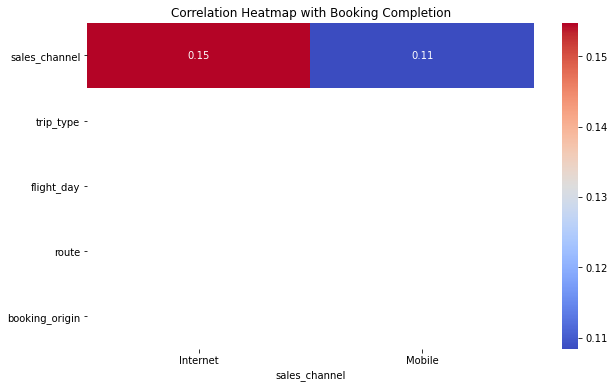

In [14]:
# Create an empty DataFrame to store correlation data
correlation_data = pd.DataFrame()

# Calculate correlation for each column
for column in categorical_columns:
    grouped_data = df.groupby(column)['booking_complete'].mean()
    correlation_data[column] = grouped_data

# Transpose the DataFrame for heatmap
correlation_data = correlation_data.T

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_data, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap with Booking Completion')
plt.show()


Now we will conduct a Chi-square test to identify significant associations.

In [15]:
from scipy.stats import chi2_contingency

# Example for sales_channel
contingency_table = pd.crosstab(df['sales_channel'], df['booking_complete'])
chi2, p, _, _ = chi2_contingency(contingency_table)
print(f'Chi-square test p-value for sales_channel: {p}')


Chi-square test p-value for sales_channel: 5.1230944214045184e-20


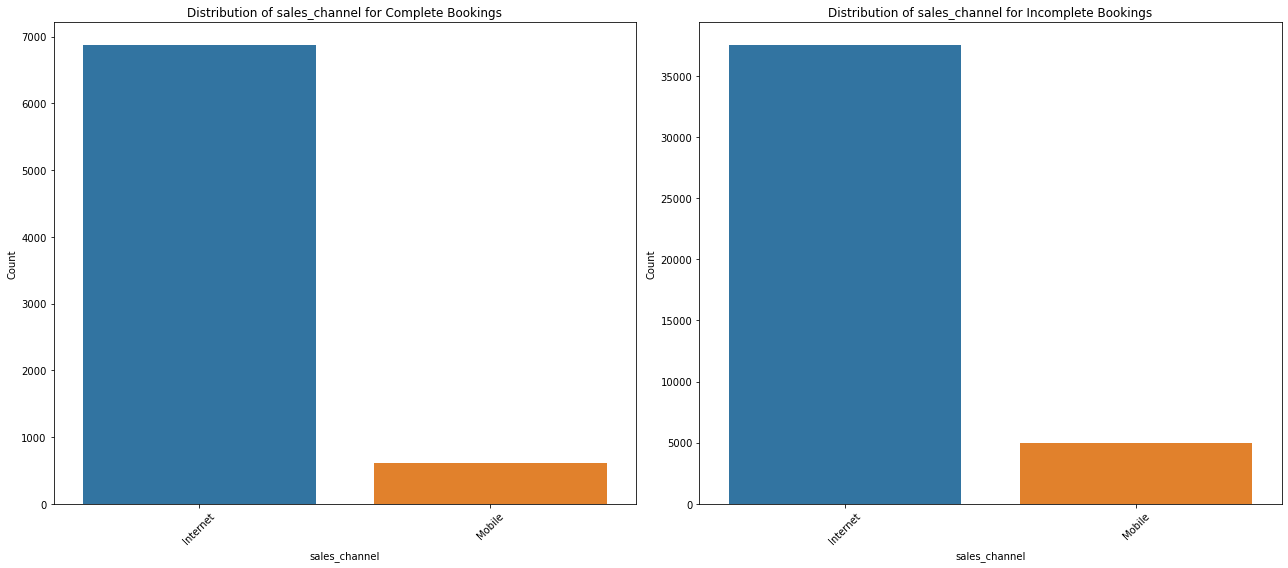

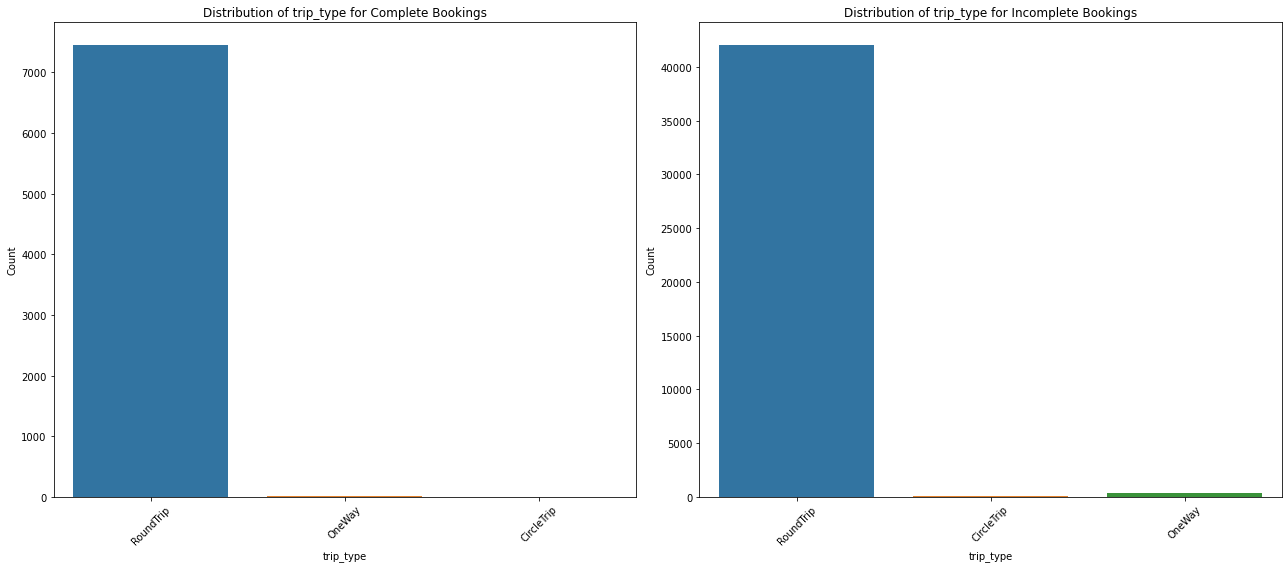

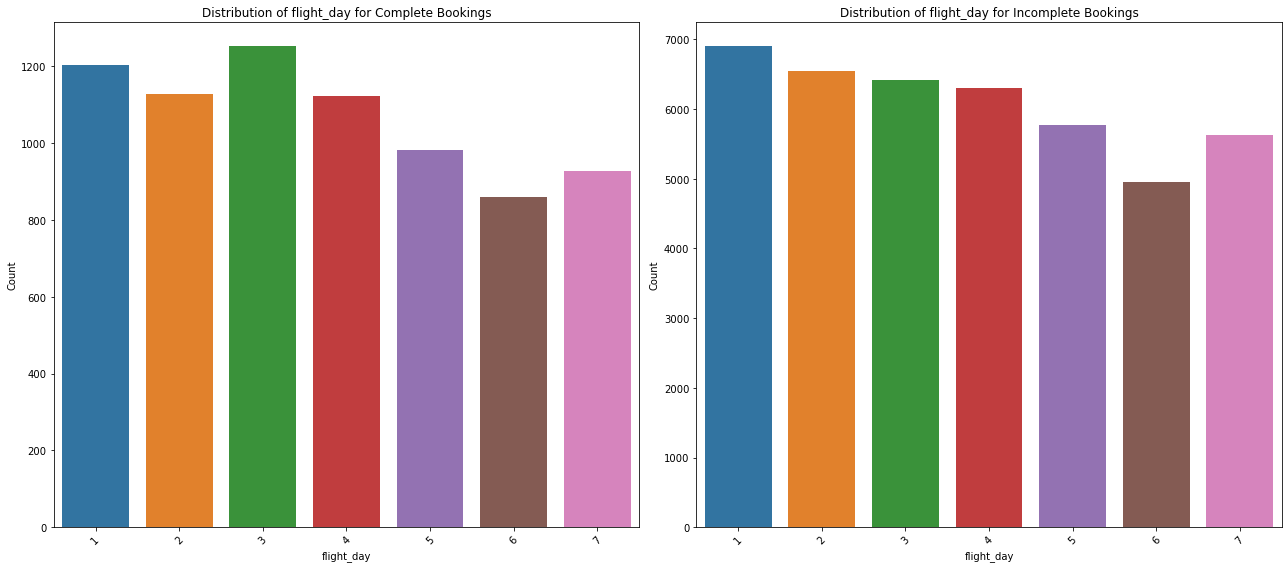

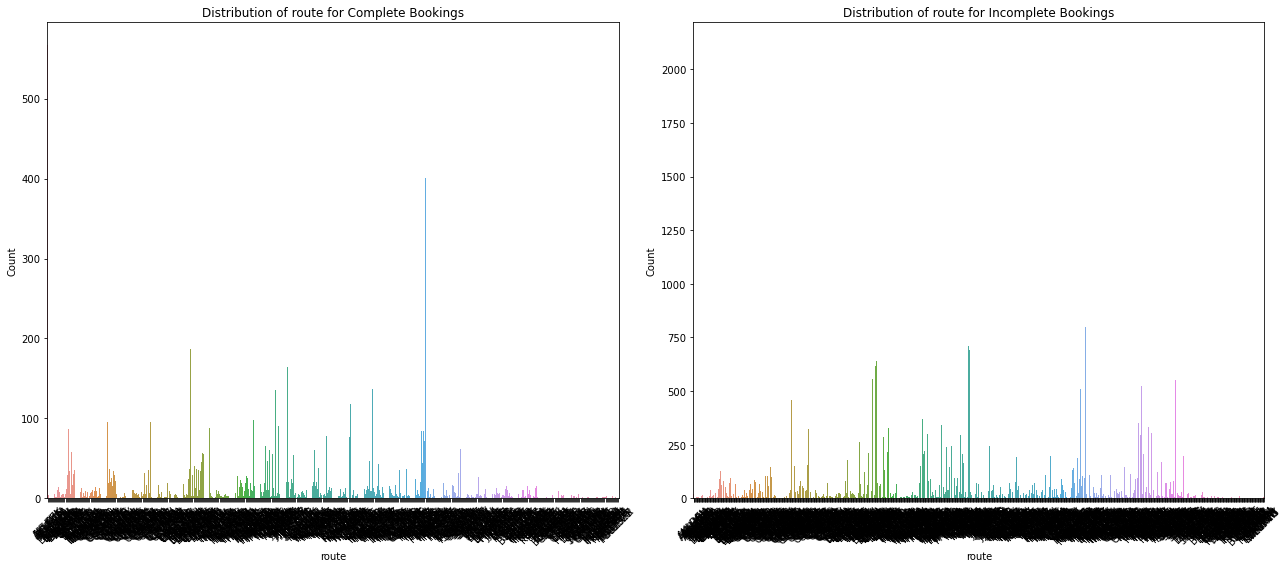

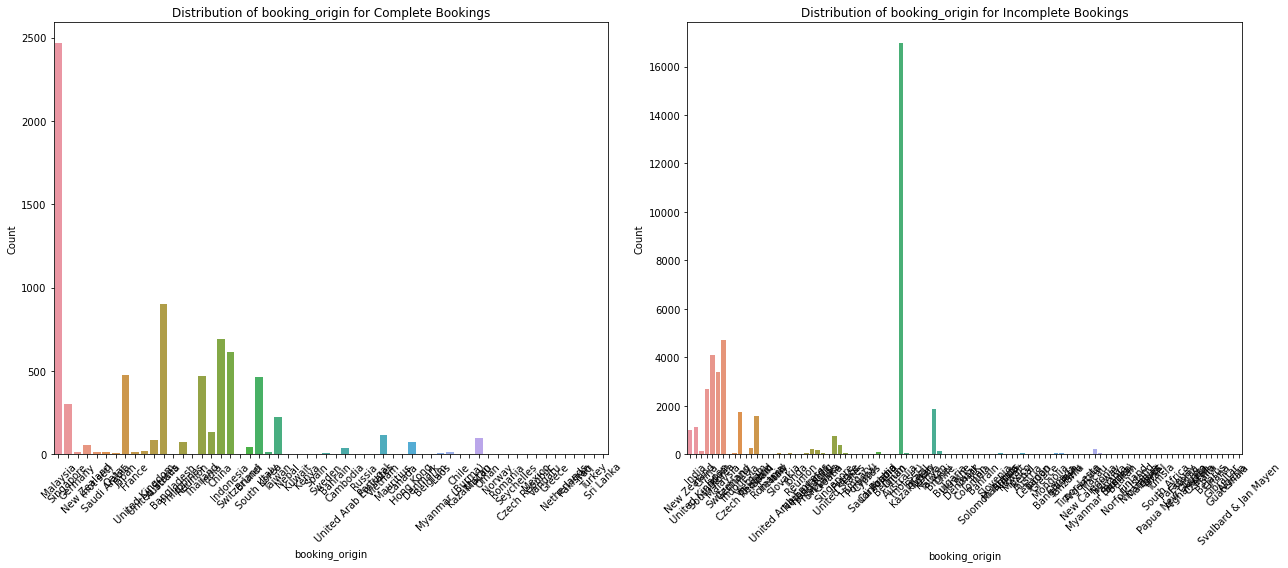

In [16]:
# Filter the DataFrame for complete and incomplete bookings
complete_bookings = df[df['booking_complete'] == 1]
incomplete_bookings = df[df['booking_complete'] == 0]

# Define a list of categorical features
categorical_features = ['sales_channel', 'trip_type', 'flight_day', 'route', 'booking_origin']

# Plot histograms for categorical features side by side
for feature in categorical_features:
    plt.figure(figsize=(18, 8))

    # Plot for complete bookings
    plt.subplot(1, 2, 1)
    sns.countplot(x=feature, data=complete_bookings)
    plt.title(f'Distribution of {feature} for Complete Bookings')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45)

    # Plot for incomplete bookings
    plt.subplot(1, 2, 2)
    sns.countplot(x=feature, data=incomplete_bookings)
    plt.title(f'Distribution of {feature} for Incomplete Bookings')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()


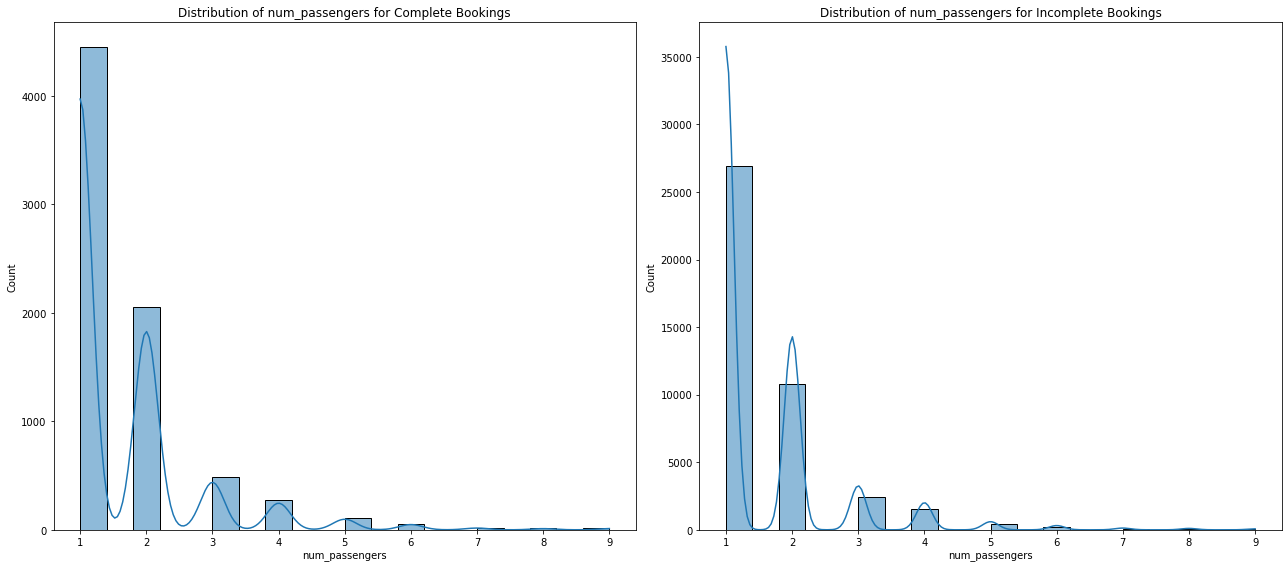

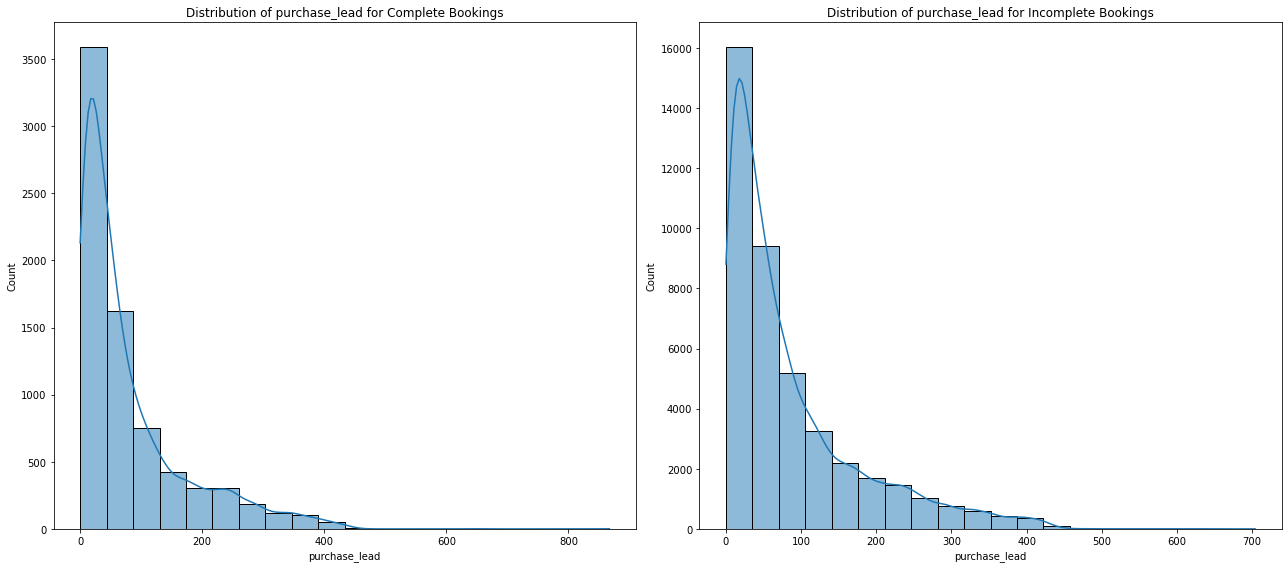

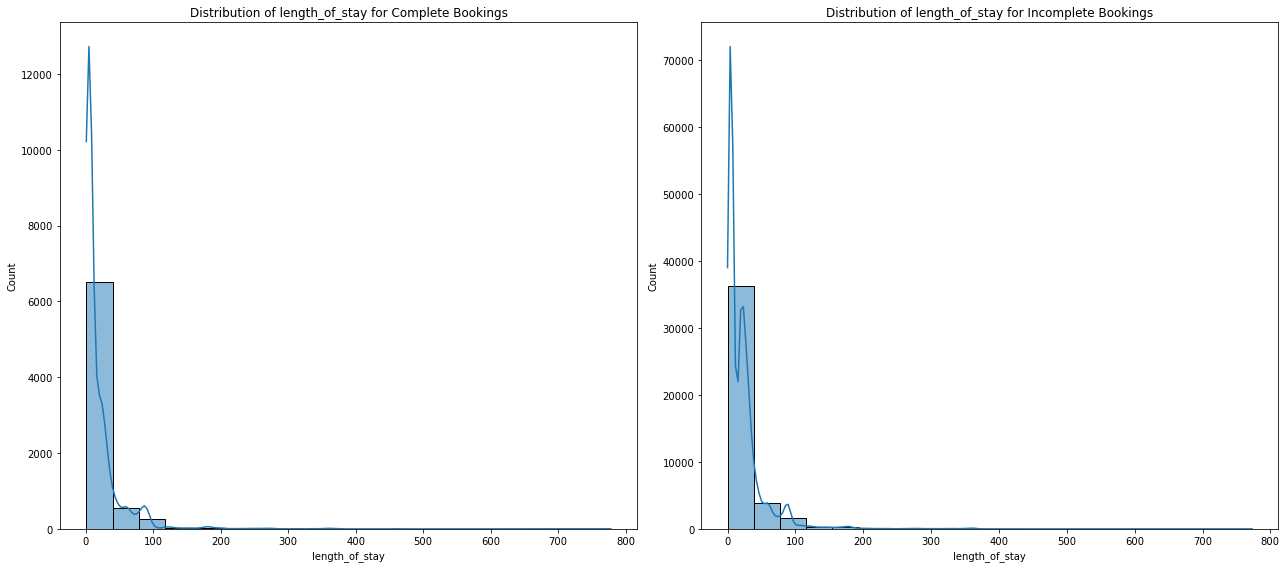

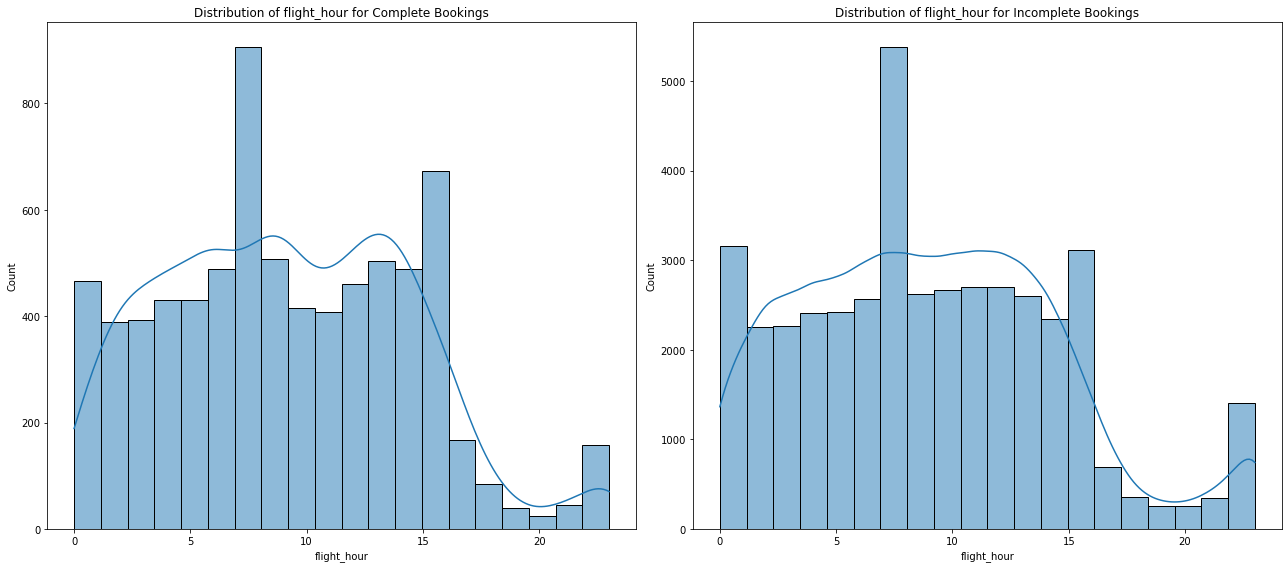

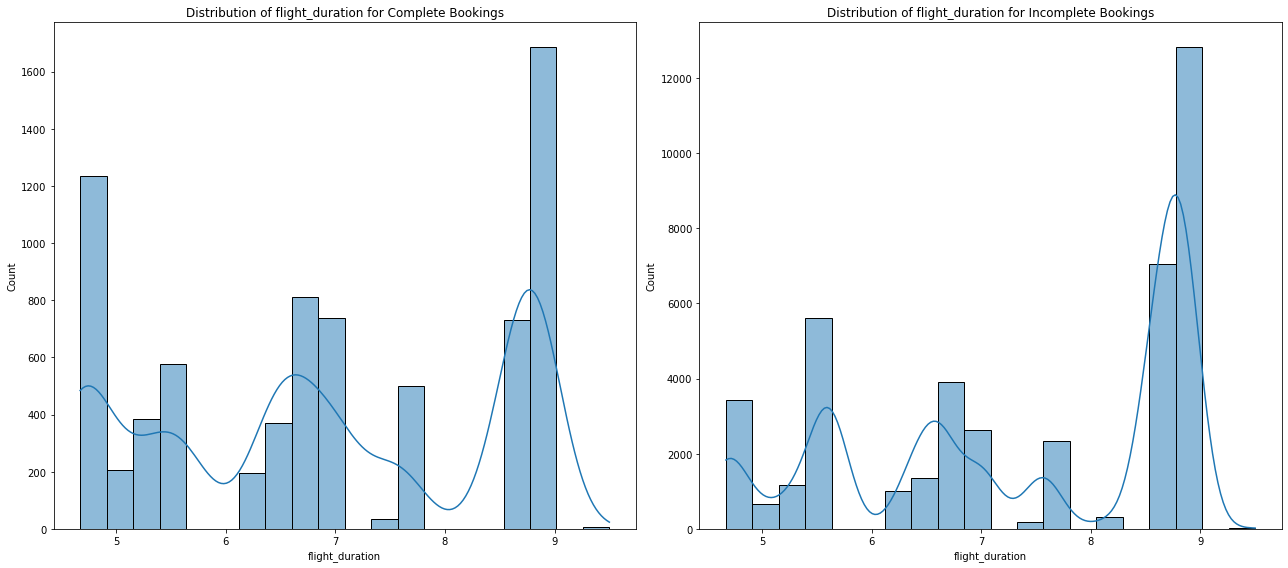

In [17]:
# Filter the DataFrame for complete and incomplete bookings
complete_bookings = df[df['booking_complete'] == 1]
incomplete_bookings = df[df['booking_complete'] == 0]

# Define a list of numerical features
numerical_features = ['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour', 'flight_duration']

# Plot histograms for numerical features side by side
for feature in numerical_features:
    plt.figure(figsize=(18, 8))

    # Plot for complete bookings
    plt.subplot(1, 2, 1)
    sns.histplot(data=complete_bookings, x=feature, bins=20, kde=True)
    plt.title(f'Distribution of {feature} for Complete Bookings')
    plt.xlabel(feature)
    plt.ylabel('Count')

    # Plot for incomplete bookings
    plt.subplot(1, 2, 2)
    sns.histplot(data=incomplete_bookings, x=feature, bins=20, kde=True)
    plt.title(f'Distribution of {feature} for Incomplete Bookings')
    plt.xlabel(feature)
    plt.ylabel('Count')

    plt.tight_layout()
    plt.show()


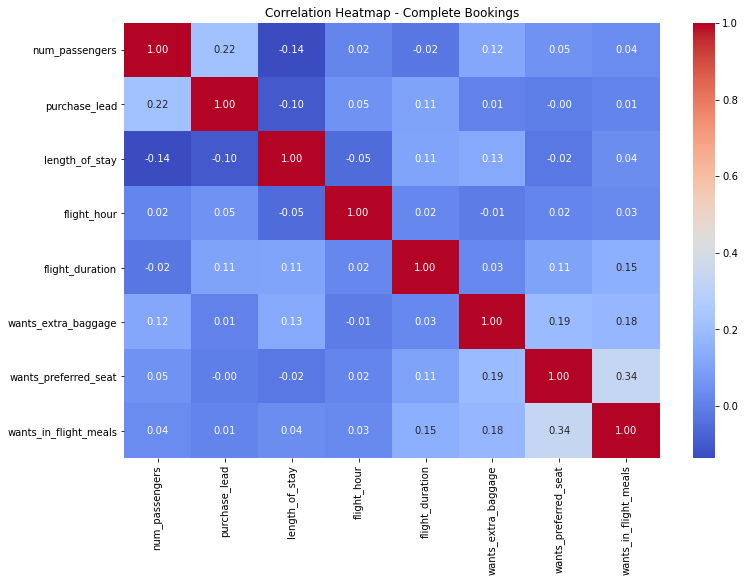

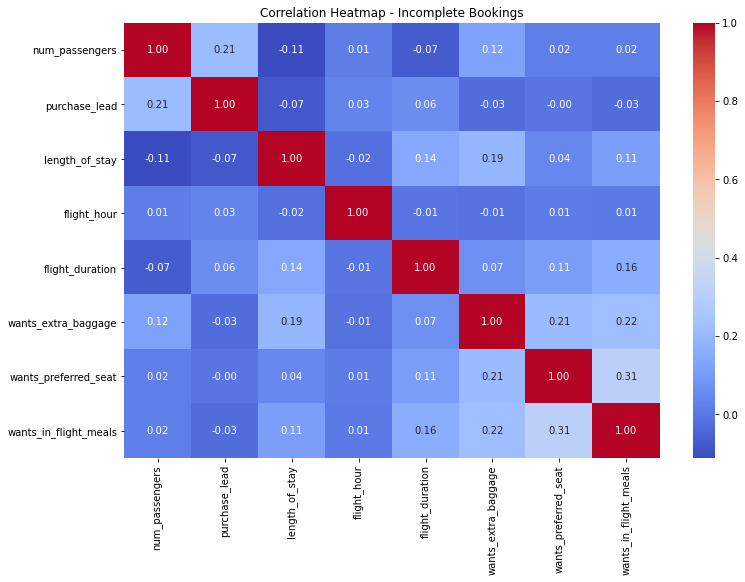

In [21]:
#Define the features for the correlation heatmap
features = ['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour', 'flight_duration',
            'wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals']

# Plot correlation heatmap for complete bookings
plt.figure(figsize=(12, 8))
sns.heatmap(complete_bookings[features].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap - Complete Bookings')
plt.show()

# Plot correlation heatmap for incomplete bookings
plt.figure(figsize=(12, 8))
sns.heatmap(incomplete_bookings[features].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap - Incomplete Bookings')
plt.show()